# SAX


### Imports

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import aeon
from aeon.transformations.collection.dictionary_based import SAX
from aeon.datasets import load_unit_test
from matplotlib import colormaps
from sklearn.preprocessing import StandardScaler

print(aeon.__version__)

0.11.1


### Dataset: aeon - Load Unit Test - Initial Stable Version

[[[3 3 0 0 1 1 0 0 0 0]]

 [[2 3 0 1 2 2 1 1 0 1]]

 [[3 2 1 2 3 2 2 1 0 0]]

 [[3 3 1 2 3 3 3 3 3 3]]

 [[2 2 0 0 0 0 0 0 0 1]]

 [[3 2 1 0 0 1 1 0 1 1]]

 [[3 3 3 1 1 2 3 2 3 3]]

 [[3 2 2 3 3 3 3 3 3 3]]

 [[3 3 3 3 3 3 3 3 3 3]]

 [[3 3 0 0 1 1 1 3 3 3]]

 [[0 0 2 2 2 3 2 1 1 1]]

 [[0 0 2 2 1 0 1 3 2 2]]

 [[0 0 1 1 0 0 0 1 0 0]]

 [[0 0 1 2 1 0 1 1 1 0]]

 [[0 1 2 3 2 0 2 3 3 3]]

 [[1 1 1 2 3 2 2 2 1 1]]

 [[0 0 3 3 2 1 0 1 1 1]]

 [[0 0 1 0 0 0 0 1 1 1]]

 [[0 0 3 2 1 1 1 0 0 0]]

 [[0 1 3 2 0 0 0 0 0 0]]]


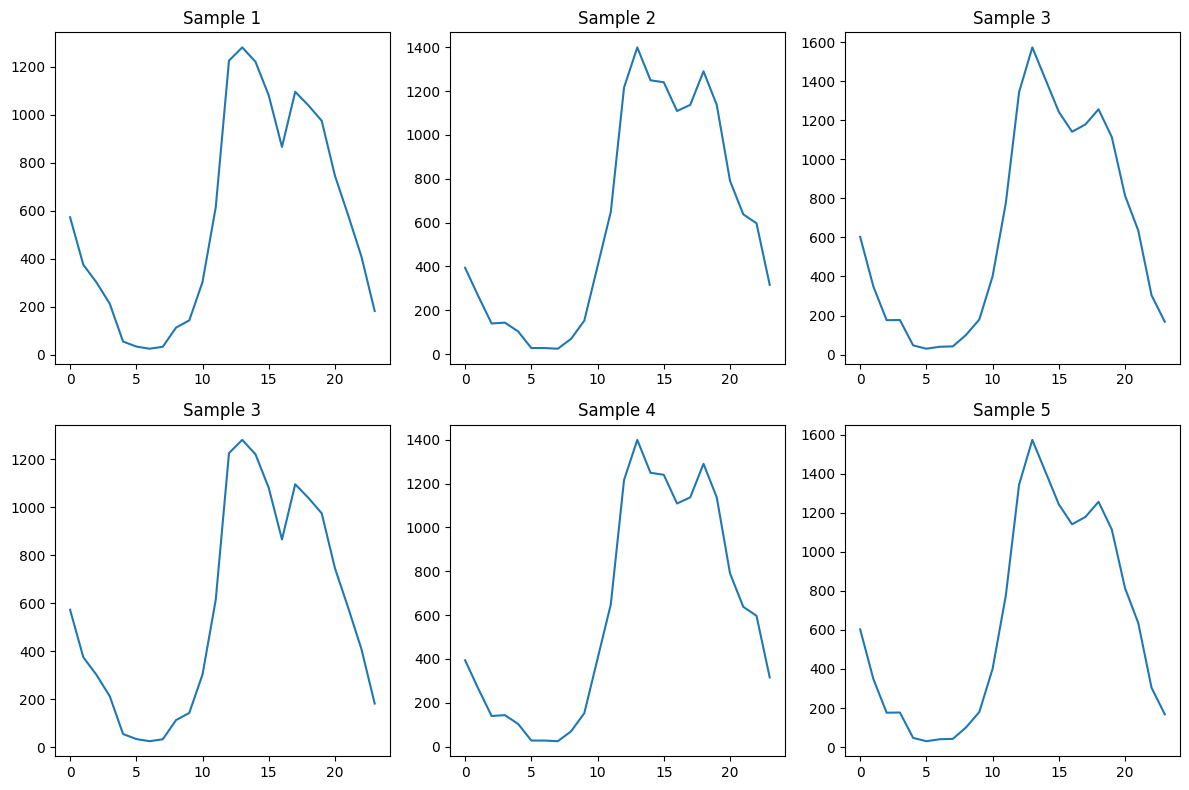

In [2]:
import matplotlib.pyplot as plt
from aeon.transformations.collection.dictionary_based import SAX
from aeon.datasets import load_unit_test
from sklearn.preprocessing import StandardScaler

X_train, y_train = load_unit_test(split="train")
X_test, y_test = load_unit_test(split="test")

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data (learn the mean and standard deviation)
scaler.fit(X_train[:, 0, :])

# Transform both the training and test data
X_train_scaled = scaler.transform(X_train[:, 0, :])
X_test_scaled = scaler.transform(X_test[:, 0, :])

sax = SAX(n_segments=10, alphabet_size=4)
X_train_sax = sax.fit_transform(X_train_scaled)

#X_train_sax = sax.fit_transform(X_train)
#X_test_sax = sax.fit_transform(X_test)

#print(X_train_sax)

# Print first 6 Samples from given dataset
# 2 rows with 3 columns:
fig, grid = plt.subplots(2, 3, figsize=(12, 8))
for j, row in enumerate(grid):
    for i, ax in enumerate(row):
        y = X_train[i][0]
        ax.plot(y)
        ax.set_title(f"Sample {j*len(grid) + i + 1}")

plt.tight_layout()
plt.show()


### Dataset: aeon - Load Unit Test

In [6]:
# Print general information of dataset
def printGeneralInfo(sax, dataset, dataset_scaled, dataset_sax, increment, time_steps, n_segments):
    
    print("sax.get_fitted_params")
    print(sax.get_fitted_params())
    

    print(f"dataset.shape: {dataset.shape}")
    print(f"dataset_scaled.shape: {dataset_scaled.shape}")
    print(f"dataset_sax.shape: {dataset_sax.shape}")
    
    print(f"increment: {increment}")
    print(f"time_steps: {time_steps}")
    print(f"n_segments: {n_segments}")
    
    
# Prints a grid of samples from a given dataset
# rows and columns have to be greater than 1
def drawGrid(sax, dataset, dataset_sax, n_segments, rows=2, columns=3):

    # Define segments as pairs of (start, end) indices with constant values
    # segments = [(5, 20), (20, 30), (30, 50), (50, 70), (70, 80), (80, 95)]  # Segment boundaries
    # segment_values = [4, 6, 5, 7, 3, 8]  # Horizontal segment values for the plot (y-values)

    time_steps = dataset.shape[2]
    #assert time_steps % n_segments == 0, "Number of time frames has to be evenly dividable by the number of segments."

    
    dataset_inverse = sax.inverse_transform(dataset_sax)
    print("dataset_inverse")
    print(dataset_inverse.shape)
    print(dataset_inverse[0])
    print()
    print(dataset[0])
    print(dataset_sax[0])
    
    
    
    increment = (time_steps / n_segments)
    
    printGeneralInfo(sax, dataset, dataset_scaled, dataset_sax, increment, time_steps, n_segments)
    
    # Define a Colormap
    get_color = colormaps['tab10']

    # Define an alphabet with corresponding labels
    alphabet = ['a', 'b', 'c', 'd']  # Alphabet labels
    #segment_labels = [0,1,2,3,0,1]  # Alphabetic labels for each segment


    fig, grid = plt.subplots(rows, columns, figsize=(columns * 4, rows * 4))
    for i, row in enumerate(grid):
        for j, ax in enumerate(row):
            sample_index = i * columns + j + 1
            #segments = [(x * increment, x * increment + increment) for x in range(n_segments)]

            sample = dataset[sample_index][0]
            sample_sax = dataset_sax[sample_index][0]

            # Plot original time series
            ax.plot(sample)
            ax.set_title(f"Sample {sample_index}")

            #segment_values = [np.mean(sample[start : end_excl]) for (start, end_excl) in segments]

            for s in range(n_segments):
                start = int(np.floor(s * increment))
                end_excl = int(np.floor((s + 1) * increment))
                s_value = np.mean(sample[start : end_excl])

                # Horizontal segment values for the plot (y-values)
                color = get_color(sample_sax[s])
                ax.hlines(y=s_value, xmin=start, xmax=end_excl, color=color, linewidth=3)  # Horizontal line

                # Annotate with the corresponding alphabet label
                #plt.text((start + end_excl) / 2, s_value, sample[s], color='black',
                         #fontsize=12, ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()


In [7]:
# Load the dataset
dataset, _ = load_unit_test()

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data (learn the mean and standard deviation)
# Transform both the training and test data
# Transposition on input and output added, as StandardScaler operates column-wise (e.g. calculates mean of first column)

dataset_scaled = scaler.fit_transform(dataset[:, 0, :].T).T

# Initialize SAX
n_segments = 11
sax = SAX(n_segments=n_segments, alphabet_size=8)

# Fit and transform the data
dataset_sax = sax.fit_transform(dataset_scaled)

drawGrid(sax, dataset, dataset_sax, n_segments, columns=2)

NotImplementedError: <class 'aeon.transformations.collection.dictionary_based._sax.SAX'> does not implement inverse_transform

In [ ]:
a = np.array([1,2,3,4,5])
print(np.sum(a[0:6]))

### Visualization

In [ ]:
# Example time series data
n = 100  # Number of time steps
time_series = np.sin(np.linspace(0, 10, n))  # Example time series data

# Define segments as pairs of (start, end) indices
segments = [(10, 20), (20, 30), (30, 40), (40, 50), (50, 99)]  # Segment start and end points

# Define the alphabet with 4 categories (A, B, C, D) corresponding to 4 colors
alphabet = ['A', 'B', 'C', 'D']  # Example alphabet of 4 categories
segment_labels = ['A', 'B', 'C', 'A', 'D']  # Example labels for each segment

# Define colors for each category in the alphabet
colors = {'A': 'orange', 'B': 'blue', 'C': 'green', 'D': 'red'}

# Plot the time series
plt.plot(time_series, label="$Time Series")

# Mark each segment with a different color based on its label
for i, (seg_start, seg_end) in enumerate(segments):
    label = segment_labels[i] # Get the label for the current segment (e.g., 'A', 'B', etc.)
    color = colors[label]  # Assign the corresponding color
    plt.axvspan(seg_start, seg_end, color=color, alpha=0.3, label=f"Segment {label}")

# Remove duplicate labels in the legend (for unique categories)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.title("Time Series with Segments Marked by Alphabet Categories")
plt.show()


In [ ]:
# Generate example time series data
n = 100
time_series = np.sin(np.linspace(0, 10, n)) * 10  # Example time series data

# Define segments as pairs of (start, end) indices with constant values
segments = [(5, 20), (20, 30), (30, 50), (50, 70), (70, 80), (80, 95)]  # Segment boundaries
segment_values = [4, 6, 5, 7, 3, 8]  # Horizontal segment values for the plot (y-values)

# Define an alphabet with corresponding labels and colors for each segment
alphabet = ['a', 'b', 'c', 'd']  # Alphabet labels
colors = ['red', 'green', 'blue', 'orange']  # Colors for each segment

# Assign each segment a label from the alphabet
segment_labels = ['a', 'b', 'c', 'd', 'a', 'b']  # Alphabetic labels for each segment

# Plot the time series
plt.plot(time_series, color='purple', alpha=0.4)  # The main time series

# Mark each segment with horizontal lines and annotate them
for i, (seg_start, seg_end) in enumerate(segments):
    y_value = segment_values[i]  # Constant y-value for the segment
    color = colors[alphabet.index(segment_labels[i])]  # Color for the segment
    plt.hlines(y=y_value, xmin=seg_start, xmax=seg_end, color=color, linewidth=3)  # Horizontal line
    
    # Annotate with the corresponding alphabet label
    plt.text((seg_start + seg_end) / 2, y_value, segment_labels[i], color='black', 
             fontsize=12, ha='center', va='bottom', fontweight='bold')

# Show the plot
plt.title("Time Series with Colored Horizontal Segments")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colormaps

# Example time series data
n = 100
time_series = np.sin(np.linspace(0, 10, n)) * 10  # Example time series data

# Define segments as pairs of (start, end) indices with constant values
segments = [(5, 20), (20, 30), (30, 50), (50, 70), (70, 80), (80, 95)]  # Segment boundaries
segment_values = [4, 6, 5, 7, 3, 8]  # Horizontal segment values for the plot (y-values)

# Define an alphabet with corresponding labels
alphabet = ['a', 'b', 'c', 'd']  # Alphabet labels
segment_labels = [0,1,2,3,0,1]  # Alphabetic labels for each segment

get_color = colormaps['tab10']

# Plot the time series
plt.plot(time_series, color='purple', alpha=0.4)  # The main time series

# Mark each segment with horizontal lines and annotate them
for i, (seg_start, seg_end) in enumerate(segments):
    y_value = segment_values[i]  # Constant y-value for the segment
    color = get_color(segment_labels[i])# Get color from the colormap based on the label
    plt.hlines(y=y_value, xmin=seg_start, xmax=seg_end, color=color, linewidth=3)  # Horizontal line
    
    # Annotate with the corresponding alphabet label
    plt.text((seg_start + seg_end) / 2, y_value, segment_labels[i], color='black', 
             fontsize=12, ha='center', va='bottom', fontweight='bold')

# Show the plot
plt.title("Time Series with Colored Horizontal Segments (Auto Colors)")
plt.show()


### Playground

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colormaps

get_color = colormaps['Accent'].resampled(8)
c=get_color(4)

ypoints = np.array([3, 8, 1, 10, 5, 7])

plt.plot(ypoints, color=c)
plt.show()
